In [61]:
import numpy as np
import matplotlib.pyplot as plt 

In [62]:
def simteg(dicesAttacker, dicesDefendant, N=1000000):
    a = np.random.randint(1,7,[dicesAttacker,N])
    d = np.random.randint(1,7,[dicesDefendant,N])
    
    a_sorted = np.sort(a, axis=0)[-dicesDefendant:]
    d_sorted = np.sort(d, axis=0)[-dicesAttacker:]
    
    wins = np.all(a_sorted > d_sorted, axis=0).sum()
    return wins/N

# 1vs1

La probabilidad de ganar en 1 vs 1 se lee de la siguiente tabla 

$$
\begin{array}{c|cccccc}
    \text{D/A} & 1 & 2 & 3 & 4 & 5 & 6 \\
    \hline
    1   & = & > & > & > & > & > \\
    2   & < & = & > & > & > & > \\
    3   & < & < & = & > & > & > \\
    4   & < & < & < & = & > & > \\
    5   & < & < & < & < & = & > \\
    6   & < & < & < & < & < & = \\
\end{array}
$$

El atacante gana en todos los > y el defensor gana en todos los < o =. Entonces,

\begin{equation}
P(D) = \frac{1 + 2 + 3 + 4 + 5 + 6}{6^2}
\end{equation}

In [63]:
p_d11 = (1 + 2 + 3 + 4 + 5 + 6) / 6**2
p_a11 = 1-p_d11

print(f'P(A) = {p_a11}')
print(f'P_s(A) = {simteg(1,1)}')

P(A) = 0.41666666666666663
P_s(A) = 0.417144


# 2vs1

La probabilidad de ganar 2vs1 se lee de una matriz 3x3, donde un eje son los dados del defensor y los otros dos son del atacante. Los casos donde gana el defensor son una pirámide y la probabilidad es

\begin{equation}
P(D) = \frac{1^2 + 2^2 + 3^2 + 4^2 + 5^2 + 6^2}{6^3}
\end{equation}

In [64]:
p_d21 = (1**2 + 2**2 + 3**2 + 4**2 + 5**2 + 6**2) / 6**3
p_a21 = 1-p_d21

print(f'P(A) = {p_a21}')
print(f'P_s(A) = {simteg(2,1)}')

P(A) = 0.5787037037037037
P_s(A) = 0.579806


# 3vs1

La probabilidad de ganar 3vs1 se generaliza a partir de lo anterior y es

\begin{equation}
P(D) = \frac{1^3 + 2^3 + 3^3 + 4^3 + 5^3 + 6^3}{6^4}
\end{equation}

In [65]:
p_d31 = (1**3 + 2**3 + 3**3 + 4**3 + 5**3 + 6**3) / 6**4
p_a31 = 1-p_d31

print(f'P(A) = {p_a31}')
print(f'P_s(A) = {simteg(3,1)}')

P(A) = 0.6597222222222222
P_s(A) = 0.659328


# 1vs2

La probabilidad se lee como en el caso 2vs1, salvo que en este caso el eje vertical del cubo que se forma es el de los dados del atacante, y a partir de ese eje se forma una pirámide. Como ahora no se cuentan los = porque esta es la probabilidad de que gane el atacante, la suma se hace hasta cinco. Entonces,

\begin{equation}
P(A) = \frac{1^2 + 2^2 + 3^2 + 4^2 + 5^2}{6^3}
\end{equation}

In [66]:
p_a12 = (1**2 + 2**2 + 3**2 + 4**2 + 5**2) / 6**3
p_d12 = 1-p_a12

print(f'P(A) = {p_a12}')
print(f'P_s(A) = {simteg(1,2)}')

P(A) = 0.25462962962962965
P_s(A) = 0.254818


# 1vs3

La probabilidad de ganar 1vs3 se generaliza como antes. 

\begin{equation}
P(A) = \frac{1^3 + 2^3 + 3^3 + 4^3 + 5^3}{6^4}
\end{equation}

In [67]:
p_a13 = (1**3 + 2**3 + 3**3 + 4**3 + 5**3) / 6**4
p_d13 = 1-p_a13

print(f'P(A) = {p_a13}')
print(f'P_s(A) = {simteg(1,3)}')

P(A) = 0.1736111111111111


P_s(A) = 0.173546


# Teg infinito

La fórmula para un dado de infinitas caras en el caso 1vs1 queda 

\begin{equation}
P(D) = \frac{\sum_{n=1}^N n }{N^2}
\end{equation}

Esta suma es igual a 

\begin{equation}
\frac{N \cdot (N + 1)}{2 \cdot N^2} = \frac{1}{2} + \frac{1}{2N}
\end{equation}

que tiende a 1/2 cuando N tiende a infinito.

En el caso 2vs1, la fórmula queda 

\begin{equation}
P(D) = \frac{\sum_{n=1}^N n^2 }{N^3} = \frac{N \cdot (N+1) \cdot (2N + 1)}{6N^3}
\end{equation}

que tiende a 1/3 cuando N tiende a infinito

En el caso 3vs1, la fórmula es

\begin{equation}
P(D) = \frac{\sum_{n=1}^N n^3 }{N^4} = \frac{N^2 \cdot (N+1)^2}{4N^4}
\end{equation}

que tiende a 1/4 cuando N tiende a infinito

# 3vs3

In [68]:
rolls = []
for A1 in range(1,7):
    for A2 in range(1,7):
        for A3 in range(1,7):
            for D1 in range(1,7):
                for D2 in range(1,7):
                    for D3 in range(1,7):
                        if A1 > A2 and A2 > A3 and D1 > D2 and D2 > D3:
                            rolls.append([A1, A2, A3, D1, D2, D3])
rolls = np.array(rolls)

In [69]:
def count(rolls):
    rolls = np.asarray(rolls)
    A1, A2, A3, D1, D2, D3 = rolls.T
    G3 = np.sum((A1 > D1) & (A2 > D2) & (A3 > D3))
    G2 = np.sum(
        (A1 <= D1) & (A2 > D2) & (A3 > D3) |
        (A1 > D1) & (A2 <= D2) & (A3 > D3) |
        (A1 > D1) & (A2 > D2) & (A3 <= D3)
    )
    G1 = np.sum(
        (A1 <= D1) & (A2 <= D2) & (A3 > D3) |
        (A1 <= D1) & (A2 > D2) & (A3 <= D3) |
        (A1 > D1) & (A2 <= D2) & (A3 <= D3)
    )
    G0 = np.sum((A1 <= D1) & (A2 <= D2) & (A3 <= D3))
    return G3, G2, G1, G0

count(rolls)


(50, 77, 98, 175)

In [70]:
cases = {
    "Y1 = Y2 = Y3, Z1 = Z2 = Z3": [],
    "Y1 = Y2 > Y3, Z1 = Z2 = Z3": [],
    "Y1 > Y2 = Y3, Z1 = Z2 = Z3": [],
    "Y1 > Y2 > Y3, Z1 = Z2 = Z3": [],
    "Y1 = Y2 = Y3, Z1 = Z2 > Z3": [],
    "Y1 = Y2 = Y3, Z1 > Z2 = Z3": [],
    "Y1 = Y2 = Y3, Z1 > Z2 > Z3": [],
    "Y1 = Y2 > Y3, Z1 = Z2 > Z3": [],
    "Y1 = Y2 > Y3, Z1 > Z2 = Z3": [],
    "Y1 = Y2 > Y3, Z1 > Z2 > Z3": [],
    "Y1 > Y2 = Y3, Z1 = Z2 > Z3": [],
    "Y1 > Y2 = Y3, Z1 > Z2 = Z3": [],
    "Y1 > Y2 = Y3, Z1 > Z2 > Z3": [],
    "Y1 > Y2 > Y3, Z1 = Z2 > Z3": [],
    "Y1 > Y2 > Y3, Z1 > Z2 = Z3": [],
    "Y1 > Y2 > Y3, Z1 > Z2 > Z3": []
}

for Y1 in range(1, 7):
    for Y2 in range(1, 7):
        for Y3 in range(1, 7):
            for Z1 in range(1, 7):
                for Z2 in range(1, 7):
                    for Z3 in range(1, 7):

                        if (Y1 == Y2 == Y3) and (Z1 == Z2 == Z3):
                            cases["Y1 = Y2 = Y3, Z1 = Z2 = Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 == Y2 > Y3) and (Z1 == Z2 == Z3):
                            cases["Y1 = Y2 > Y3, Z1 = Z2 = Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 > Y2 == Y3) and (Z1 == Z2 == Z3):
                            cases["Y1 > Y2 = Y3, Z1 = Z2 = Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 > Y2 > Y3) and (Z1 == Z2 == Z3):
                            cases["Y1 > Y2 > Y3, Z1 = Z2 = Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 == Y2 == Y3) and (Z1 == Z2 > Z3):
                            cases["Y1 = Y2 = Y3, Z1 = Z2 > Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 == Y2 == Y3) and (Z1 > Z2 == Z3):
                            cases["Y1 = Y2 = Y3, Z1 > Z2 = Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 == Y2 == Y3) and (Z1 > Z2 > Z3):
                            cases["Y1 = Y2 = Y3, Z1 > Z2 > Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 == Y2 > Y3) and (Z1 == Z2 > Z3):
                            cases["Y1 = Y2 > Y3, Z1 = Z2 > Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 == Y2 > Y3) and (Z1 > Z2 == Z3):
                            cases["Y1 = Y2 > Y3, Z1 > Z2 = Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 == Y2 > Y3) and (Z1 > Z2 > Z3):
                            cases["Y1 = Y2 > Y3, Z1 > Z2 > Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 > Y2 == Y3) and (Z1 == Z2 > Z3):
                            cases["Y1 > Y2 = Y3, Z1 = Z2 > Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 > Y2 == Y3) and (Z1 > Z2 == Z3):
                            cases["Y1 > Y2 = Y3, Z1 > Z2 = Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 > Y2 == Y3) and (Z1 > Z2 > Z3):
                            cases["Y1 > Y2 = Y3, Z1 > Z2 > Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 > Y2 > Y3) and (Z1 == Z2 > Z3):
                            cases["Y1 > Y2 > Y3, Z1 = Z2 > Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 > Y2 > Y3) and (Z1 > Z2 == Z3):
                            cases["Y1 > Y2 > Y3, Z1 > Z2 = Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 > Y2 > Y3) and (Z1 > Z2 > Z3):
                            cases["Y1 > Y2 > Y3, Z1 > Z2 > Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])

print(cases)



{'Y1 = Y2 = Y3, Z1 = Z2 = Z3': [[1, 1, 1, 1, 1, 1], [1, 1, 1, 2, 2, 2], [1, 1, 1, 3, 3, 3], [1, 1, 1, 4, 4, 4], [1, 1, 1, 5, 5, 5], [1, 1, 1, 6, 6, 6], [2, 2, 2, 1, 1, 1], [2, 2, 2, 2, 2, 2], [2, 2, 2, 3, 3, 3], [2, 2, 2, 4, 4, 4], [2, 2, 2, 5, 5, 5], [2, 2, 2, 6, 6, 6], [3, 3, 3, 1, 1, 1], [3, 3, 3, 2, 2, 2], [3, 3, 3, 3, 3, 3], [3, 3, 3, 4, 4, 4], [3, 3, 3, 5, 5, 5], [3, 3, 3, 6, 6, 6], [4, 4, 4, 1, 1, 1], [4, 4, 4, 2, 2, 2], [4, 4, 4, 3, 3, 3], [4, 4, 4, 4, 4, 4], [4, 4, 4, 5, 5, 5], [4, 4, 4, 6, 6, 6], [5, 5, 5, 1, 1, 1], [5, 5, 5, 2, 2, 2], [5, 5, 5, 3, 3, 3], [5, 5, 5, 4, 4, 4], [5, 5, 5, 5, 5, 5], [5, 5, 5, 6, 6, 6], [6, 6, 6, 1, 1, 1], [6, 6, 6, 2, 2, 2], [6, 6, 6, 3, 3, 3], [6, 6, 6, 4, 4, 4], [6, 6, 6, 5, 5, 5], [6, 6, 6, 6, 6, 6]], 'Y1 = Y2 > Y3, Z1 = Z2 = Z3': [[2, 2, 1, 1, 1, 1], [2, 2, 1, 2, 2, 2], [2, 2, 1, 3, 3, 3], [2, 2, 1, 4, 4, 4], [2, 2, 1, 5, 5, 5], [2, 2, 1, 6, 6, 6], [3, 3, 1, 1, 1, 1], [3, 3, 1, 2, 2, 2], [3, 3, 1, 3, 3, 3], [3, 3, 1, 4, 4, 4], [3, 3, 1, 5, 5, 

In [71]:
for case, values in cases.items():
    print(count(values))

(15, 0, 0, 21)
(20, 35, 0, 35)
(20, 0, 35, 35)
(15, 35, 35, 35)
(20, 0, 35, 35)
(20, 35, 0, 35)
(15, 35, 35, 35)
(50, 35, 35, 105)
(50, 70, 70, 35)
(48, 98, 77, 77)
(15, 35, 70, 105)
(50, 35, 35, 105)
(27, 42, 98, 133)
(27, 42, 98, 133)
(48, 98, 77, 77)
(50, 77, 98, 175)


# 2vs3

In [72]:
cases = {
    "Y1 = Y2, Z1 = Z2 = Z3": [],
    "Y1 > Y2, Z1 = Z2 = Z3": [],
    "Y1 = Y2, Z1 = Z2 > Z3": [],
    "Y1 = Y2, Z1 > Z2 = Z3": [],
    "Y1 = Y2, Z1 > Z2 > Z3": [],
    "Y1 > Y2, Z1 = Z2 > Z3": [],
    "Y1 > Y2, Z1 > Z2 = Z3": [],
    "Y1 > Y2, Z1 > Z2 > Z3": []
}

for Y1 in range(1, 7):
    for Y2 in range(1, 7):
        for Z1 in range(1, 7):
            for Z2 in range(1, 7):
                for Z3 in range(1, 7):
                    if (Y1 == Y2) and (Z1 == Z2 == Z3):
                        cases["Y1 = Y2, Z1 = Z2 = Z3"].append([Y1, Y2, Z1, Z2, Z3])
                    elif (Y1 > Y2) and (Z1 == Z2 == Z3):
                        cases["Y1 > Y2, Z1 = Z2 = Z3"].append([Y1, Y2, Z1, Z2, Z3])
                    elif (Y1 == Y2) and (Z1 == Z2 > Z3):
                        cases["Y1 = Y2, Z1 = Z2 > Z3"].append([Y1, Y2, Z1, Z2, Z3])
                    elif (Y1 == Y2) and (Z1 > Z2 == Z3):
                        cases["Y1 = Y2, Z1 > Z2 = Z3"].append([Y1, Y2, Z1, Z2, Z3])
                    elif (Y1 == Y2) and (Z1 > Z2 > Z3):
                        cases["Y1 = Y2, Z1 > Z2 > Z3"].append([Y1, Y2, Z1, Z2, Z3])
                    elif (Y1 > Y2) and (Z1 == Z2 > Z3):
                        cases["Y1 > Y2, Z1 = Z2 > Z3"].append([Y1, Y2, Z1, Z2, Z3])
                    elif (Y1 > Y2) and (Z1 > Z2 == Z3):
                        cases["Y1 > Y2, Z1 > Z2 = Z3"].append([Y1, Y2, Z1, Z2, Z3])
                    elif (Y1 > Y2) and (Z1 > Z2 > Z3):
                        cases["Y1 > Y2, Z1 > Z2 > Z3"].append([Y1, Y2, Z1, Z2, Z3])

print(cases)


{'Y1 = Y2, Z1 = Z2 = Z3': [[1, 1, 1, 1, 1], [1, 1, 2, 2, 2], [1, 1, 3, 3, 3], [1, 1, 4, 4, 4], [1, 1, 5, 5, 5], [1, 1, 6, 6, 6], [2, 2, 1, 1, 1], [2, 2, 2, 2, 2], [2, 2, 3, 3, 3], [2, 2, 4, 4, 4], [2, 2, 5, 5, 5], [2, 2, 6, 6, 6], [3, 3, 1, 1, 1], [3, 3, 2, 2, 2], [3, 3, 3, 3, 3], [3, 3, 4, 4, 4], [3, 3, 5, 5, 5], [3, 3, 6, 6, 6], [4, 4, 1, 1, 1], [4, 4, 2, 2, 2], [4, 4, 3, 3, 3], [4, 4, 4, 4, 4], [4, 4, 5, 5, 5], [4, 4, 6, 6, 6], [5, 5, 1, 1, 1], [5, 5, 2, 2, 2], [5, 5, 3, 3, 3], [5, 5, 4, 4, 4], [5, 5, 5, 5, 5], [5, 5, 6, 6, 6], [6, 6, 1, 1, 1], [6, 6, 2, 2, 2], [6, 6, 3, 3, 3], [6, 6, 4, 4, 4], [6, 6, 5, 5, 5], [6, 6, 6, 6, 6]], 'Y1 > Y2, Z1 = Z2 = Z3': [[2, 1, 1, 1, 1], [2, 1, 2, 2, 2], [2, 1, 3, 3, 3], [2, 1, 4, 4, 4], [2, 1, 5, 5, 5], [2, 1, 6, 6, 6], [3, 1, 1, 1, 1], [3, 1, 2, 2, 2], [3, 1, 3, 3, 3], [3, 1, 4, 4, 4], [3, 1, 5, 5, 5], [3, 1, 6, 6, 6], [3, 2, 1, 1, 1], [3, 2, 2, 2, 2], [3, 2, 3, 3, 3], [3, 2, 4, 4, 4], [3, 2, 5, 5, 5], [3, 2, 6, 6, 6], [4, 1, 1, 1, 1], [4, 1, 2, 2

In [73]:
def count(rolls):
    rolls = np.asarray(rolls)
    A1, A2, D1, D2, D3 = rolls.T
    G2 = np.sum((A1 > D1) & (A2 > D2))
    G1 = np.sum(
        (A1 <= D1) & (A2 > D2) |
        (A1 > D1) & (A2 <= D2)
    )
    G0 = np.sum((A1 <= D1) & (A2 <= D2))
    return np.array([G2, G1, G0])

In [74]:
cases_prob = {
    "Y1 = Y2, Z1 = Z2 = Z3": 1/6**2 * 1/6**3,
    "Y1 > Y2, Z1 = Z2 = Z3": 2/6**2 * 1/6**3,
    "Y1 = Y2, Z1 = Z2 > Z3": 1/6**2 * 3/6**3,
    "Y1 = Y2, Z1 > Z2 = Z3": 1/6**2 * 3/6**3,
    "Y1 = Y2, Z1 > Z2 > Z3": 1/6**2 * 6/6**3,
    "Y1 > Y2, Z1 = Z2 > Z3": 2/6**2 * 3/6**3,
    "Y1 > Y2, Z1 > Z2 = Z3": 2/6**2 * 3/6**3,
    "Y1 > Y2, Z1 > Z2 > Z3": 2/6**2 * 6/6**3
}

p2v3 = 0
for case, values in cases.items():
    p2v3 += count(values) * cases_prob[case]
p2v3

array([0.12590021, 0.25475823, 0.61934156])

# Markov

In [75]:
def getProbability(armies_attacker, armies_defender, armies_won):
    probabilities = {
        (1, 1, 1): 15/36,        # π111
        (1, 1, 0): 21/36,        # π110
        (1, 2, 1): 55/216,       # π121
        (1, 2, 0): 161/216,      # π120
        (1, 3, 1): 25/144,       # π131 Mio
        (1, 3, 0): 119/144,      # π130 Mio

        (2, 1, 1): 125/216,      # π211
        (2, 1, 0): 91/216,       # π210
        (2, 2, 2): 295/1296,     # π222
        (2, 2, 1): 420/1296,     # π221
        (2, 2, 0): 581/1296,     # π220
        (2, 3, 2): 0.12590021,   # π232
        (2, 3, 1): 0.25475823,   # π231
        (2, 3, 0): 0.61934156,   # π230

        (3, 1, 1): 855/1296,     # π311
        (3, 1, 0): 441/1296,     # π310
        (3, 2, 2): 2890/7776,    # π322
        (3, 2, 1): 2611/7776,    # π321
        (3, 2, 0): 2275/7776,    # π320
        (3, 3, 3): 0.1376028807, # π333
        (3, 3, 2): 0.2146990741, # π332
        (3, 3, 1): 0.2646604938, # π331
        (3, 3, 0): 0.3830375514, # π330
    }
    if armies_attacker > 3:
        armies_attacker = 3
    if armies_defender > 3: # Regla de TEG vs RISK
        armies_defender = 3
    return probabilities[(armies_attacker, armies_defender, armies_won)]


In [76]:
def getStates(armies_attacker, armies_defender):
    transient_states = []
    absorbing_states = []

    for i in range(1, armies_attacker+1):
        for j in range(1, armies_defender+1):
            transient_states.append((i, j))

    for i in range(1, armies_attacker+1):
        absorbing_states.append((i, 0))
    for j in range(1, armies_defender+1):
        absorbing_states.append((0, j)) 
    
    return transient_states, absorbing_states

In [83]:
def getMatrixEntries(current_state, post_state):
    attacker_dices_current, defender_dices_current = current_state
    attacker_dices_post, defender_dices_post = post_state
    armies_won = defender_dices_current - defender_dices_post
    armies_lost = attacker_dices_current - attacker_dices_post
    if armies_won < 0  or armies_lost < 0 or (armies_lost + armies_won) != min(min(attacker_dices_current, 3), min(defender_dices_current, 3)) or (armies_lost + armies_won > 3): # Regla de TEG vs RISK
        return 0
    else:
        return getProbability(attacker_dices_current, defender_dices_current, armies_won)

In [84]:
def getMatrixR(armies_attacker, armies_defender):
    R = np.zeros((armies_attacker * armies_defender, armies_attacker + armies_defender))
    transient_states, absorbing_states = getStates(armies_attacker, armies_defender)

    for i, transient_state in enumerate(transient_states):
        for j, absorbing_state in enumerate(absorbing_states):
            R[i, j] = getMatrixEntries(transient_state, absorbing_state)
    return R

In [85]:
def getMatrixQ(armies_attacker, armies_defender):
    Q = np.zeros((armies_attacker * armies_defender, armies_attacker * armies_defender))
    transient_states, _ = getStates(armies_attacker, armies_defender)

    for i, transient_state_1 in enumerate(transient_states):
        for j, transient_state_2 in enumerate(transient_states):
            Q[i, j] = getMatrixEntries(transient_state_1, transient_state_2)
    return Q

In [86]:
def getMatrixS(Q, R):
    I = np.identity(Q.shape[0])
    return np.matmul(np.linalg.inv(I - Q), R)


In [87]:
def calculateWiningProbability(armies_attacker, armies_defender):
    Q = getMatrixQ(armies_attacker, armies_defender)
    R = getMatrixR(armies_attacker, armies_defender)
    S = getMatrixS(Q, R)
    wining_probability = S[-1:][0][:armies_attacker].sum()
    return wining_probability 

In [95]:
armies_attacker = 10
armies_defender = 10

P = np.zeros((armies_attacker, armies_defender))
for A in range(armies_attacker):
    for D in range(armies_defender):
        P[A, D] = calculateWiningProbability(A+1, D+1) 

In [96]:
# Print the table
print("Attacker ↓ / Defender →\n")
print("   |", end="")
for D in range(armies_defender):
    print(f"   {D + 1}  |", end="")
print()

print("----")

for A in range(armies_attacker):
    print(f" {A + 1} |", end="")
    for D in range(armies_defender):
        print(f" {P[A, D]:5.3f} |", end="")
    print("\n----")

Attacker ↓ / Defender →

   |   1  |   2  |   3  |   4  |   5  |   6  |   7  |   8  |   9  |   10  |
----
 1 | 0.417 | 0.106 | 0.027 | 0.007 | 0.002 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 |
----
 2 | 0.754 | 0.363 | 0.206 | 0.091 | 0.049 | 0.021 | 0.011 | 0.005 | 0.003 | 0.001 |
----
 3 | 0.916 | 0.656 | 0.470 | 0.315 | 0.206 | 0.134 | 0.084 | 0.054 | 0.033 | 0.021 |
----
 4 | 0.972 | 0.785 | 0.642 | 0.477 | 0.359 | 0.253 | 0.181 | 0.123 | 0.086 | 0.057 |
----
 5 | 0.990 | 0.890 | 0.769 | 0.638 | 0.506 | 0.397 | 0.297 | 0.224 | 0.162 | 0.118 |
----
 6 | 0.997 | 0.934 | 0.857 | 0.745 | 0.638 | 0.521 | 0.423 | 0.329 | 0.258 | 0.193 |
----
 7 | 0.999 | 0.967 | 0.910 | 0.834 | 0.736 | 0.640 | 0.536 | 0.446 | 0.357 | 0.287 |
----
 8 | 1.000 | 0.980 | 0.947 | 0.888 | 0.818 | 0.730 | 0.643 | 0.547 | 0.464 | 0.380 |
----
 9 | 1.000 | 0.990 | 0.967 | 0.930 | 0.873 | 0.808 | 0.726 | 0.646 | 0.558 | 0.480 |
----
 10 | 1.000 | 0.994 | 0.981 | 0.954 | 0.916 | 0.861 | 0.800 | 0.724 | 0.650 | 0.568 

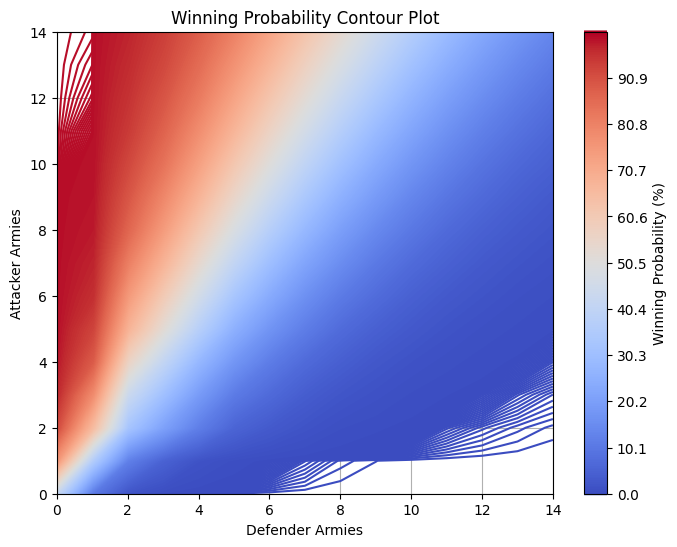

In [ ]:
plt.figure(figsize=(8, 6))
plt.contour(P, levels=np.arange(0, 101, 0.1), cmap='coolwarm')
plt.colorbar(label='Winning Probability (%)')

# Add labels and title
plt.xlabel('Defender Armies')
plt.ylabel('Attacker Armies')
plt.title('Winning Probability Contour Plot')

plt.grid(True)
plt.show()

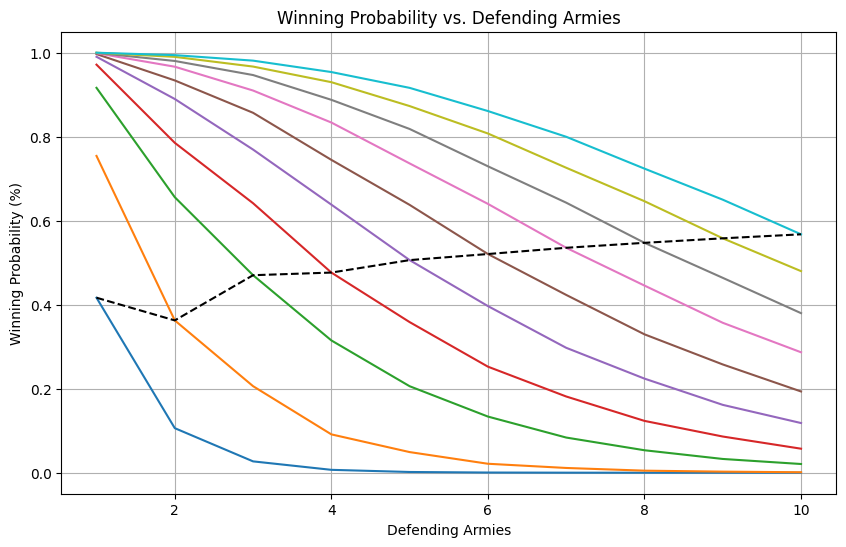

In [97]:
# Plotting
plt.figure(figsize=(10, 6))
for A in range(armies_attacker):
    plt.plot(range(1, armies_defender + 1), P[A, :], label=f'Attacking Armies = {A + 1}')

equal_armies_curve = np.diag(P)
plt.plot(range(1, armies_defender + 1), equal_armies_curve, linestyle='--', color='black', label='Equal Armies')


# Add labels and title
plt.xlabel('Defending Armies')
plt.ylabel('Winning Probability (%)')
plt.title('Winning Probability vs. Defending Armies')
#plt.legend()
plt.grid(True)
plt.show()
